# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier, circs

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit3 import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(0.001, 0.002)
        p2 = random.uniform(-0.002, -0.001)
        p3 = random.uniform(-0.2, -0.1)


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
Noisy diff is 0.054597412109375076
Mitigated diff is 0.0029830166361417554
1
Noisy diff is 0.05943652343749983
Mitigated diff is 0.010254007960355693
2
Noisy diff is 0.06616455078125005
Mitigated diff is 0.013944728052980082
3
Noisy diff is 0.05752172851562487
Mitigated diff is 0.009078715408940008
4
Noisy diff is 0.056889892578125156
Mitigated diff is 0.020465559359260643
5
Noisy diff is 0.05642700195312478
Mitigated diff is 0.008750697246546757
6
Noisy diff is 0.056475341796874856
Mitigated diff is 0.008845845734126723
7
Noisy diff is 0.060691162109375085
Mitigated diff is 0.006411828210851622
8
Noisy diff is 0.05967260742187497
Mitigated diff is 0.019402552655677585
9
Noisy diff is 0.06408520507812487
Mitigated diff is 0.010025925707322081
10
Noisy diff is 0.06449682617187502
Mitigated diff is 0.017562505067631795
11
Noisy diff is 0.05519995117187482
Mitigated diff is 0.009164420199257561
12
Noisy diff is 0.05879052734375012
Mitigated diff is 0.014876182333484644
13
Noisy diff is 

Noisy diff is 0.06259179687500005
Mitigated diff is 0.01108188488486328
109
Noisy diff is 0.054536376953124854
Mitigated diff is 0.01186924670050904
110
Noisy diff is 0.05723388671875007
Mitigated diff is 0.010179239347371416
111
Noisy diff is 0.05645507812499995
Mitigated diff is 0.009625353167644679
112
Noisy diff is 0.06042846679687486
Mitigated diff is 0.010701817670176972
113
Noisy diff is 0.06470874023437512
Mitigated diff is 0.014772792897206788
114
Noisy diff is 0.05057934570312517
Mitigated diff is 0.007924223936870423
115
Noisy diff is 0.0614465332031251
Mitigated diff is 0.020092642454117016
116
Noisy diff is 0.05140502929687485
Mitigated diff is 0.005628252763945962
117
Noisy diff is 0.07102221679687504
Mitigated diff is 0.019111645120287735
118
Noisy diff is 0.05742065429687493
Mitigated diff is 0.010658600248492522
119
Noisy diff is 0.05625683593749997
Mitigated diff is 0.016878859150831982
120
Noisy diff is 0.06116943359374982
Mitigated diff is 0.017811107057005504
121
N

Noisy diff is 0.06300097656250014
Mitigated diff is 0.013067259326404734
216
Noisy diff is 0.05841137695312493
Mitigated diff is 0.016290319749694415
217
Noisy diff is 0.05571118164062483
Mitigated diff is 0.006454436741643921
218
Noisy diff is 0.059186523437500194
Mitigated diff is 0.006140469710944174
219
Noisy diff is 0.06270288085937503
Mitigated diff is 0.023613495428318476
220
Noisy diff is 0.05492456054687511
Mitigated diff is 0.0007416470583185841
221
Noisy diff is 0.057587890624999805
Mitigated diff is 0.013370413733402087
222
Noisy diff is 0.056205078125000085
Mitigated diff is 0.0011721444222527744
223
Noisy diff is 0.05827563476562503
Mitigated diff is 0.013806617609178451
224
Noisy diff is 0.062200683593750083
Mitigated diff is 0.015686656388316678
225
Noisy diff is 0.05331347656249985
Mitigated diff is 0.008433678111168241
226
Noisy diff is 0.05188281250000015
Mitigated diff is 0.011206845893906747
227
Noisy diff is 0.051626953124999986
Mitigated diff is 0.013565062612084

Noisy diff is 0.0540134277343749
Mitigated diff is 0.005916539503258766
323
Noisy diff is 0.05090942382812491
Mitigated diff is 0.012751758587549622
324
Noisy diff is 0.05635961914062482
Mitigated diff is 0.010320843408977876
325
Noisy diff is 0.06406030273437491
Mitigated diff is 0.014179370623950804
326
Noisy diff is 0.0707976074218748
Mitigated diff is 0.018376432947477817
327
Noisy diff is 0.05234838867187519
Mitigated diff is 0.0038192366715315007
328
Noisy diff is 0.0624760742187499
Mitigated diff is 0.0084993787543588
329
Noisy diff is 0.06900341796874976
Mitigated diff is 0.014385204416270891
330
Noisy diff is 0.05798632812499993
Mitigated diff is 0.012687571364182526
331
Noisy diff is 0.06256616210937516
Mitigated diff is 0.021039230745383275
332
Noisy diff is 0.05598828124999988
Mitigated diff is 0.01795628875248001
333
Noisy diff is 0.04631176757812505
Mitigated diff is 0.013289839397798486
334
Noisy diff is 0.058015380859374854
Mitigated diff is 0.01436947139232303
335
Nois

Noisy diff is 0.05512060546874986
Mitigated diff is 0.008685244307558682
430
Noisy diff is 0.05872534179687472
Mitigated diff is 0.01333371889070123
431
Noisy diff is 0.05942211914062501
Mitigated diff is 0.008014790688911866
432
Noisy diff is 0.055244628906249815
Mitigated diff is 0.011102550779103382
433
Noisy diff is 0.055655273437499986
Mitigated diff is 0.011305414198431674
434
Noisy diff is 0.05585961914062487
Mitigated diff is 0.009695104275557753
435
Noisy diff is 0.05885449218749983
Mitigated diff is 0.014487617330586122
436
Noisy diff is 0.0652646484374999
Mitigated diff is 0.008154228678961983
437
Noisy diff is 0.06795239257812491
Mitigated diff is 0.00889054600455963
438
Noisy diff is 0.06227685546875006
Mitigated diff is 0.0157766342815171
439
Noisy diff is 0.06133789062499995
Mitigated diff is 0.019236955617082607
440
Noisy diff is 0.06348095703124979
Mitigated diff is 0.02404351062891097
441
Noisy diff is 0.05231420898437489
Mitigated diff is 0.010745596584404549
442
Noi

Noisy diff is 0.060958740234374975
Mitigated diff is 0.013552834833352456
537
Noisy diff is 0.05467138671875027
Mitigated diff is 0.011308282776251621
538
Noisy diff is 0.05938745117187483
Mitigated diff is 0.010636158091041015
539
Noisy diff is 0.06202148437499999
Mitigated diff is 0.014748035191063602
540
Noisy diff is 0.057513916015625055
Mitigated diff is 0.0033529211023353156
541
Noisy diff is 0.0651254882812502
Mitigated diff is 0.0173639176072633
542
Noisy diff is 0.05525659179687459
Mitigated diff is 0.019741063201121456
543
Noisy diff is 0.06105493164062503
Mitigated diff is 0.01228984008893419
544
Noisy diff is 0.05382885742187482
Mitigated diff is 0.013498937396488664
545
Noisy diff is 0.055229003906250185
Mitigated diff is 0.016804499759138336
546
Noisy diff is 0.04721411132812481
Mitigated diff is 0.016308988727201434
547
Noisy diff is 0.055181396484375034
Mitigated diff is 0.008113007538251615
548
Noisy diff is 0.05431152343750001
Mitigated diff is 0.017059193101820025
54

Noisy diff is 0.055406982421874806
Mitigated diff is 0.01211952333756594
644
Noisy diff is 0.04861767578124976
Mitigated diff is 0.00845425101627395
645
Noisy diff is 0.061135009765624915
Mitigated diff is 0.012908845879597841
646
Noisy diff is 0.06892358398437493
Mitigated diff is 0.018657732967986673
647
Noisy diff is 0.05488818359375003
Mitigated diff is 0.007464302228804343
648
Noisy diff is 0.06574047851562503
Mitigated diff is 0.01987310828277633
649
Noisy diff is 0.052978515625
Mitigated diff is 0.018671848794161727
650
Noisy diff is 0.04909594726562494
Mitigated diff is 0.016343707014556674
651
Noisy diff is 0.05591699218749979
Mitigated diff is 0.01574748268924009
652
Noisy diff is 0.05495874023437497
Mitigated diff is 0.008001153512286141
653
Noisy diff is 0.05539819335937479
Mitigated diff is 0.006913083552731791
654
Noisy diff is 0.05620654296874994
Mitigated diff is 0.009556179589724767
655
Noisy diff is 0.05674462890624987
Mitigated diff is 0.008781508808739291
656
Noisy 

Noisy diff is 0.05807861328124986
Mitigated diff is 0.01373348798553864
751
Noisy diff is 0.06330786132812483
Mitigated diff is 0.01967082367502293
752
Noisy diff is 0.05799511718749972
Mitigated diff is 0.007659379769535901
753
Noisy diff is 0.058279785156249986
Mitigated diff is 0.01330466049250223
754
Noisy diff is 0.05924072265625002
Mitigated diff is 0.017642338038480698
755
Noisy diff is 0.056251708984374815
Mitigated diff is 0.005517520532852371
756
Noisy diff is 0.05429199218750003
Mitigated diff is 0.011779610054658995
757
Noisy diff is 0.060507812499999813
Mitigated diff is 0.014786869765434085
758
Noisy diff is 0.060992187499999906
Mitigated diff is 0.010619836738781974
759
Noisy diff is 0.05727441406250011
Mitigated diff is 0.014271418040540329
760
Noisy diff is 0.06048291015625007
Mitigated diff is 0.014390494851286073
761
Noisy diff is 0.0559958496093752
Mitigated diff is 0.014439914670303367
762
Noisy diff is 0.056143310546874936
Mitigated diff is 0.0023093680841725917
7

Noisy diff is 0.052309082031249954
Mitigated diff is 0.010809087277739549
858
Noisy diff is 0.051301757812500126
Mitigated diff is 0.007251445169414117
859
Noisy diff is 0.06252270507812518
Mitigated diff is 0.013430638307005527
860
Noisy diff is 0.06523657226562496
Mitigated diff is 0.014911121721974618
861
Noisy diff is 0.058157958984375036
Mitigated diff is 0.019226518143314886
862
Noisy diff is 0.05755859374999983
Mitigated diff is 0.006876213906536366
863
Noisy diff is 0.06096240234375028
Mitigated diff is 0.014352693476228806
864
Noisy diff is 0.05502685546874986
Mitigated diff is 0.013574434455738249
865
Noisy diff is 0.05727661132812489
Mitigated diff is 0.01698413008432542
866
Noisy diff is 0.05995678710937491
Mitigated diff is 0.016128645833333177
867
Noisy diff is 0.06173730468750005
Mitigated diff is 0.012699125267094047
868
Noisy diff is 0.05699609375000003
Mitigated diff is 0.008715817808493842
869
Noisy diff is 0.0678723144531248
Mitigated diff is 0.013781218699919773
87

Noisy diff is 0.06632812499999985
Mitigated diff is 0.019195867137419498
965
Noisy diff is 0.060528076171874945
Mitigated diff is 0.017607003527071674
966
Noisy diff is 0.06252197265625004
Mitigated diff is 0.012095179038048576
967
Noisy diff is 0.058381591796874854
Mitigated diff is 0.007947182992788626
968
Noisy diff is 0.05084936523437511
Mitigated diff is 0.013948015336443298
969
Noisy diff is 0.059954833984374956
Mitigated diff is 0.009741352711958307
970
Noisy diff is 0.06365185546875018
Mitigated diff is 0.01684004305698661
971
Noisy diff is 0.05854565429687497
Mitigated diff is 0.007953570832379242
972
Noisy diff is 0.06876513671875029
Mitigated diff is 0.016411889532166324
973
Noisy diff is 0.06490209960937499
Mitigated diff is 0.006289675981570486
974
Noisy diff is 0.05290624999999993
Mitigated diff is 0.010315420386904917
975
Noisy diff is 0.06328417968750011
Mitigated diff is 0.021210424476781897
976
Noisy diff is 0.050901123046874774
Mitigated diff is 0.004398140477144263


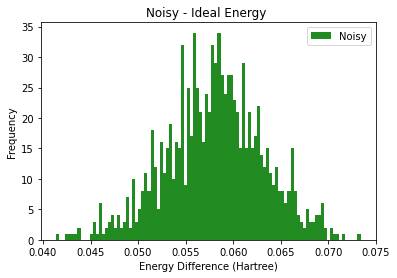

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "forestgreen", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_restricted_3.png', dpi = 1000)

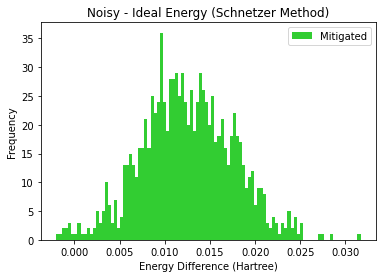

In [9]:
a = plt.figure()
#plt.hist(diff_r, bins=100, color = "red", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "limegreen", label = 'Mitigated')
plt.title("Noisy - Ideal Energy (Schnetzer Method)")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_Mitigated_Restricted_3.png', dpi = 1000)

In [10]:
energies

[[[0.0012722426144878521, -0.0019462429437231746, -0.1457923762593516],
  -1.0784425359189185,
  -1.0238451238095434,
  -1.0754595192827767],
 [[0.0014356172923172472, -0.001860411717915354, -0.10856413301979953],
  -1.0967330632626684,
  -1.0372965398251686,
  -1.0864790553023127],
 [[0.0014250713543152824, -0.0017019636727631537, -0.14882511643934396],
  -1.0842342839657935,
  -1.0180697331845434,
  -1.0702895559128134],
 [[0.0015802092070490378, -0.0015988624217770542, -0.14185886023530733],
  -1.0815560613095434,
  -1.0240343327939185,
  -1.0724773459006034],
 [[0.0015833270388373507, -0.0017908761322747992, -0.1034778457973122],
  -1.1034300847470435,
  -1.0465401921689184,
  -1.0829645253877829],
 [[0.0015476386601366659, -0.0010982632617801507, -0.15627657886240087],
  -1.0767904363095433,
  -1.0203634343564185,
  -1.0680397390629965],
 [[0.0013394204918563326, -0.00172053191398375, -0.13071972653882505],
  -1.0861573796689183,
  -1.0296820378720435,
  -1.0773115339347916],
 [[0

In [11]:
diff_r

[0.054597412109375076,
 0.05943652343749983,
 0.06616455078125005,
 0.05752172851562487,
 0.056889892578125156,
 0.05642700195312478,
 0.056475341796874856,
 0.060691162109375085,
 0.05967260742187497,
 0.06408520507812487,
 0.06449682617187502,
 0.05519995117187482,
 0.05879052734375012,
 0.061759521484375135,
 0.05539160156249978,
 0.05895947265625012,
 0.05085327148437502,
 0.05876245117187473,
 0.05830273437500022,
 0.056227783203124826,
 0.04762963867187464,
 0.05477832031249985,
 0.06324682617187505,
 0.05662109374999991,
 0.06324511718750014,
 0.05848168945312482,
 0.05975952148437491,
 0.0663115234374998,
 0.05882104492187512,
 0.05813476562499997,
 0.051709716796875194,
 0.06139355468749996,
 0.05259814453124978,
 0.060417236328125234,
 0.061155761718750146,
 0.05378515625000002,
 0.06035034179687493,
 0.0627941894531252,
 0.06090014648437503,
 0.057687011718750014,
 0.05135083007812491,
 0.06284741210937472,
 0.061403564453125004,
 0.053132568359374854,
 0.062040039062499774,

In [12]:
diff_nr

[0.0029830166361417554,
 0.010254007960355693,
 0.013944728052980082,
 0.009078715408940008,
 0.020465559359260643,
 0.008750697246546757,
 0.008845845734126723,
 0.006411828210851622,
 0.019402552655677585,
 0.010025925707322081,
 0.017562505067631795,
 0.009164420199257561,
 0.014876182333484644,
 0.01650012655720512,
 0.004168340610546384,
 0.008461096881582808,
 0.020300679301167524,
 0.01647433953849964,
 0.009922249647054127,
 0.014587432809161083,
 0.008508792401175302,
 0.01171665873731298,
 0.006451945314884799,
 0.006044530415331151,
 0.01671933241996726,
 0.02244085956461217,
 0.003858443753625318,
 0.013650658255589754,
 0.0015238950773619475,
 0.003391406965430388,
 0.009219783319978747,
 0.016528628535940726,
 0.014550305131066699,
 0.016081083841289034,
 0.007756233664339307,
 0.00963849128844263,
 0.010678868888047255,
 0.014372771460285927,
 0.007696136258489972,
 0.010089253507467921,
 0.014646355359050567,
 0.011342571686126401,
 0.010848942295768493,
 0.013777111385

# Without Readout